In [43]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [44]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NL_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,NaN,NaN,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,NaN,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,NaN,0.94,...,0.0,0.0,0.132,NaN,NaN,0.180,0.048,NaN,101.0,1028.0
2,0.00,0.00,NaN,0.0,0.63,NaN,0.31,NaN,0.31,NaN,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,NaN,1.85,NaN,0.00,1.85,0.00,0.00,...,0.0,NaN,NaN,0.0,0.000,NaN,0.000,3.000,15.0,NaN
4,0.00,0.00,0.00,0.0,NaN,0.00,NaN,0.00,0.00,0.64,...,NaN,0.0,NaN,0.0,0.164,0.054,0.000,NaN,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,NaN,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,NaN,NaN,1.160,0.000,NaN,3.121,15.0,103.0
4593,0.00,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.00,0.00,...,0.0,NaN,NaN,0.0,0.000,0.000,NaN,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,NaN,0.00,0.00,0.00,0.00,...,NaN,NaN,0.136,0.0,0.000,0.000,NaN,1.837,12.0,68.0
4595,0.17,0.00,NaN,NaN,0.34,0.34,NaN,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,NaN,69.0


In [45]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	820
float64		column 2	754
float64		column 3	1052
float64		column 4	994
float64		column 5	812
float64		column 6	696
float64		column 7	812
float64		column 8	1102
float64		column 9	1102
float64		column 10	638
float64		column 11	580
float64		column 12	696
float64		column 13	1284
float64		column 14	928
float64		column 15	1226
float64		column 16	878
float64		column 17	812
float64		column 18	820
float64		column 19	986
float64		column 20	928
float64		column 21	1168
float64		column 22	994
float64		column 23	1110
float64		column 24	1044
float64		column 25	704
float64		column 26	994
float64		column 27	1044
float64		column 28	696
float64		column 29	928
float64		column 30	762
float64		column 31	1110
float64		column 32	1168
float64		column 33	754
float64		column 34	878
float64		column 35	812
float64		column 36	812
float64		column 37	936
float64		column 38	1102
float64		column 39	928
float64		column 40	1052
float64		column 41	580
float64		column

In [46]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,3777.000000,3843.000000,3545.000000,3603.000000,3785.000000,3901.000000,3785.000000,3495.000000,3495.000000,3959.000000,...,3777.000000,3727.000000,3437.000000,3545.000000,3893.000000,3661.000000,3603.000000,3661.000000,3785.000000,3495.000000
mean,0.094326,0.190820,0.256835,0.064566,0.289609,0.086450,0.102497,0.083557,0.074498,0.219192,...,0.025761,0.029591,0.132123,0.015572,0.254488,0.068752,0.039794,4.872768,50.086922,247.311588
std,0.296266,1.202815,0.471497,1.386959,0.634799,0.257711,0.361149,0.327430,0.259848,0.628296,...,0.242567,0.202098,0.278878,0.117069,0.823665,0.225422,0.456132,27.155116,201.605044,465.230461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.616000,6.000000,37.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.000000,0.000000,0.000000,2.340000,15.000000,99.000000
75%,0.000000,0.000000,0.370000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.110000,...,0.000000,0.000000,0.173000,0.000000,0.298000,0.048000,0.000000,3.812000,43.000000,248.500000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,6.060000,5.260000,18.180000,...,8.330000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,9088.000000


<AxesSubplot:>

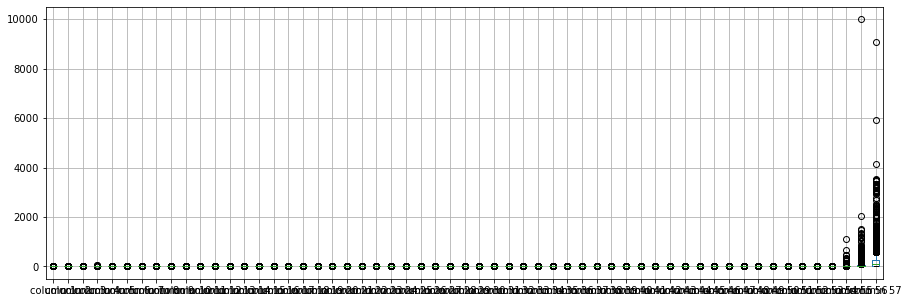

In [47]:
df.boxplot(return_type='axes', figsize=(15,5))

In [48]:
df.mean()

column 1       0.094326
column 2       0.190820
column 3       0.256835
column 4       0.064566
column 5       0.289609
column 6       0.086450
column 7       0.102497
column 8       0.083557
column 9       0.074498
column 10      0.219192
column 11      0.054327
column 12      0.514958
column 13      0.073716
column 14      0.045388
column 15      0.040047
column 16      0.214660
column 17      0.129908
column 18      0.164048
column 19      1.630662
column 20      0.069030
column 21      0.754459
column 22      0.102390
column 23      0.082423
column 24      0.085685
column 25      0.516414
column 26      0.230810
column 27      0.636445
column 28      0.116788
column 29      0.089155
column 30      0.089043
column 31      0.050605
column 32      0.043068
column 33      0.084908
column 34      0.041834
column 35      0.090011
column 36      0.082243
column 37      0.127935
column 38      0.012690
column 39      0.051592
column 40      0.047066
column 41      0.043112
column 42      0

In [49]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-4.494671e-03,0.075522,0.005515,0.015258,0.044682,0.022949,0.003262,0.089302,0.022104,...,-0.016324,-0.026077,-0.019850,-0.031790,0.060902,0.105483,-0.012166,0.061474,4.535085e-02,0.093155
column 2,-0.004495,1.000000e+00,-0.036795,-0.004364,-0.021366,-0.022121,0.013526,-0.017904,-0.002562,0.036387,...,-0.015541,-0.006322,-0.059466,-0.016120,-0.009971,-0.002429,0.005546,0.004618,-5.967863e-07,-0.015307
column 3,0.075522,-3.679504e-02,1.000000,-0.017576,0.085300,0.106825,0.059806,0.037954,0.072110,0.012692,...,-0.020924,-0.029060,-0.010965,-0.032273,0.083783,0.098075,-0.007958,0.121021,7.535847e-02,0.086986
column 4,0.005515,-4.364347e-03,-0.017576,1.000000,0.011243,-0.002343,0.016346,0.000547,-0.009340,-0.001728,...,-0.004374,-0.000928,-0.018906,-0.005163,-0.001755,0.013874,-0.000309,0.004104,3.446445e-02,0.029848
column 5,0.015258,-2.136607e-02,0.085300,0.011243,1.000000,0.068726,0.161600,0.031745,0.020688,0.027593,...,-0.036712,-0.027391,-0.055570,-0.021565,0.015641,0.029299,0.005642,0.048533,5.004362e-02,0.017348
column 6,0.044682,-2.212115e-02,0.106825,-0.002343,0.068726,1.000000,0.063078,0.085697,0.088350,0.007285,...,-0.027320,-0.001922,-0.017308,-0.020885,0.046016,0.135835,0.019877,-0.007961,7.145947e-02,0.084049
column 7,0.022949,1.352573e-02,0.059806,0.016346,0.161600,0.063078,1.000000,0.049848,0.080289,0.070042,...,-0.027549,-0.028487,-0.038729,-0.032451,0.040613,0.065083,0.055719,0.047110,6.397912e-02,0.003566
column 8,0.003262,-1.790403e-02,0.037954,0.000547,0.031745,0.085697,0.049848,1.000000,0.139833,0.072585,...,-0.023411,-0.024350,-0.025545,-0.015584,0.044110,0.075800,-0.012789,0.009918,5.751537e-02,0.046061
column 9,0.089302,-2.561960e-03,0.072110,-0.009340,0.020688,0.088350,0.080289,0.139833,1.000000,0.122541,...,-0.029203,-0.019559,-0.018917,0.006917,0.027081,0.100028,-0.006918,0.113992,1.264301e-01,0.248675
column 10,0.022104,3.638721e-02,0.012692,-0.001728,0.027593,0.007285,0.070042,0.072585,0.122541,1.000000,...,-0.010451,0.010949,0.012649,0.006571,0.041946,0.076180,0.013820,0.083195,8.307025e-02,0.110955


In [50]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [17,17+1000,17+1000+1000,17+1000+1000+1000,17+1000+1000,17+1000,17], vae_layer = False, seed = 10000)
imputer.build_model(df)
imputer.train_model(training_epochs=10)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 441.1304236754308
Epoch: 1 , loss: 437.0340397266561
Epoch: 2 , loss: 433.7412646622608
Epoch: 3 , loss: 443.008519295616
Epoch: 4 , loss: 433.78746917937275
Epoch: 5 , loss: 425.3831091957225


In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Spam_NL_5(imp).xlsx", index=False, header=False)